# Customer Churn Analytics: Unlocking the Secrets Behind Lost Connections

<div style="display: flex; justify-content: center;">
    <img src="churn.png" alt="churn" style="width: 480px; height: 230px;">
</div>

## 1. Introduction
The Customer Churn Analytics project aims to analyze customer data from a telecommunications company and develop a predictive model to identify customers who are likely to churn. Churn refers to customers who discontinue their services with a company. The dataset used for this analysis contains various attributes related to customer demographics, contract details and usage behavior.

**Dataset Source:** The dataset used in this project is sourced from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and is provided in a CSV (Comma-Separated Values) file format. It includes information on customer attributes such as gender, age, contract tenure, monthly charges and whether the customer churned or not. The 'Churn' column serves as the target variable, and our goal is to build a predictive model to classify customers as churned or non-churned based on their characteristics.

In [1]:
# Data Manipulation and Visualization
import numpy as np          # Numerical operations
import pandas as pd         # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns       # Enhanced data visualization

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder   # Label encoding
from sklearn.preprocessing import StandardScaler  # Feature scaling

# Statistical Modeling and Analysis
import statsmodels.api as sm  # Statistical modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Multicollinearity analysis

# Model Evaluation and Metrics
from sklearn.metrics import mutual_info_score   # Mutual information scoring
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LogisticRegression  # Logistic regression modeling
import sklearn.metrics as metrics   # Model evaluation metrics

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE  # Oversampling for imbalanced data

# ROC Curve Analysis
from sklearn.metrics import roc_curve, roc_auc_score  # ROC curve analysis

## 2. Data Overview and Cleaning

Data overview and cleaning was carried out to ensure that the dataset is suitable for analysis and modeling. It involves identifying and resolving issues with the dataset, such as missing values, duplicate records, inconsistent formatting, and handling any errors that might affect the quality of the analysis or the performance of machine learning models. 

In [2]:
# Read the Customer churn data from a CSV file and display the first 10 rows of the dataset to get a quick overview
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# Get the shape (number of rows and columns) of the dataset
data.shape

(7043, 21)

In [4]:
# Display information about the dataset, such as data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 2.1. Handling Missing Values and Incorrect Data Types:
I handled missing values and incorrect data types by converting the 'TotalCharges' column to numeric type and filling any parsing errors with zeros.

In [5]:
# Convert the 'TotalCharges' column to numeric and handle any parsing errors by filling NaNs with 0.0
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0.0)

In [6]:
# Check for missing values in the dataset
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.2. Checking for Duplicates:
I checked for duplicated rows in the dataset and removed them to ensure data integrity.

In [7]:
# Check for duplicated rows in the dataset
data.duplicated().sum()

0

In [8]:
# Remove duplicate rows from the dataset
data.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### 2.3. Removing Unnecessary Columns:
The 'customerID' column is not relevant for this prediction task, so I dropped it from the dataset.

In [9]:
# Drop the 'customerID' column as it doesn't contribute to the prediction
data.drop('customerID', axis=1, inplace=True)

#### 2.4. Summary Statistics and Unique Values:
Next, I displayed summary statistics for all numerical columns in the dataset to understand their distribution and variation. Additionally, I listed unique values for each categorical column to gain insights into the data's categorical attributes.

In [10]:
# Display summary statistics for all numerical columns in the dataset
data.describe(include = 'all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [11]:
# Display unique values for each column in the dataset
data.apply(lambda x: x.unique())

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

## 3. Exploratory Data Analysis (EDA)

In this section, I used data visualization techniques to gain visual insights into the dataset's distribution and relationships between variables. Visualization helps in understanding data patterns and identifying trends that might be relevant for the churn prediction task.

#### 3.1. Visualizing Customer-Related Attributes:
I used count plots to visualize the distribution of customer-related attributes (gender, senior citizen status, partner status and dependents) by the 'Churn' class. This helps to understand how churn varies across different customer segments.

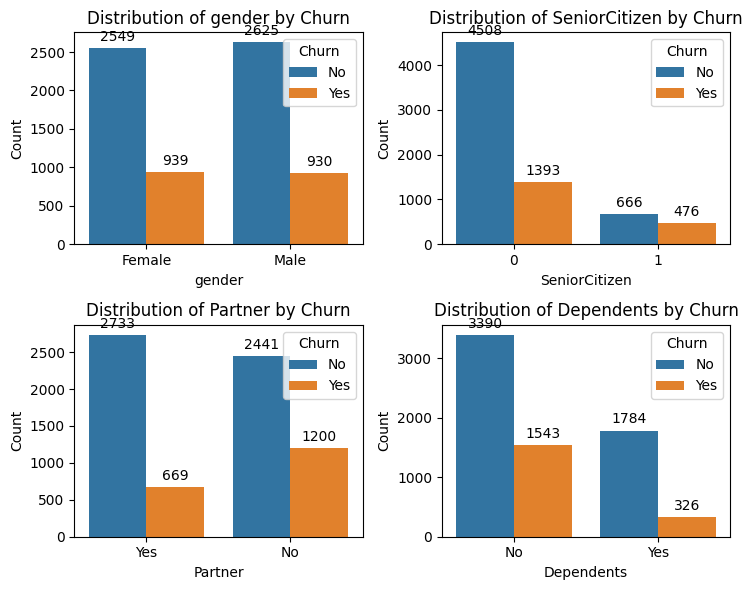

In [12]:
# Visualize the distribution of customer-related info columns by the 'Churn' class
select_data = data[['gender','SeniorCitizen', 'Partner', 'Dependents', 'Churn']]
categorical_columns = [col for col in select_data.columns if col != 'Churn']

fig, axes = plt.subplots(2, 2, figsize=(7.5, 6))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Churn', data=select_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn')

    # Annotate each bar with its count value
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height),
                         xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        
for j in range(len(categorical_columns), 2 * 2):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### 3.2. Visualizing Contract-Related Attributes:
Next, I used histograms and box plots to visualize the distribution of contract-related attributes (tenure, monthly charges and total charges). The box plots also allow me to identify potential outliers and the spread of values for each attribute.

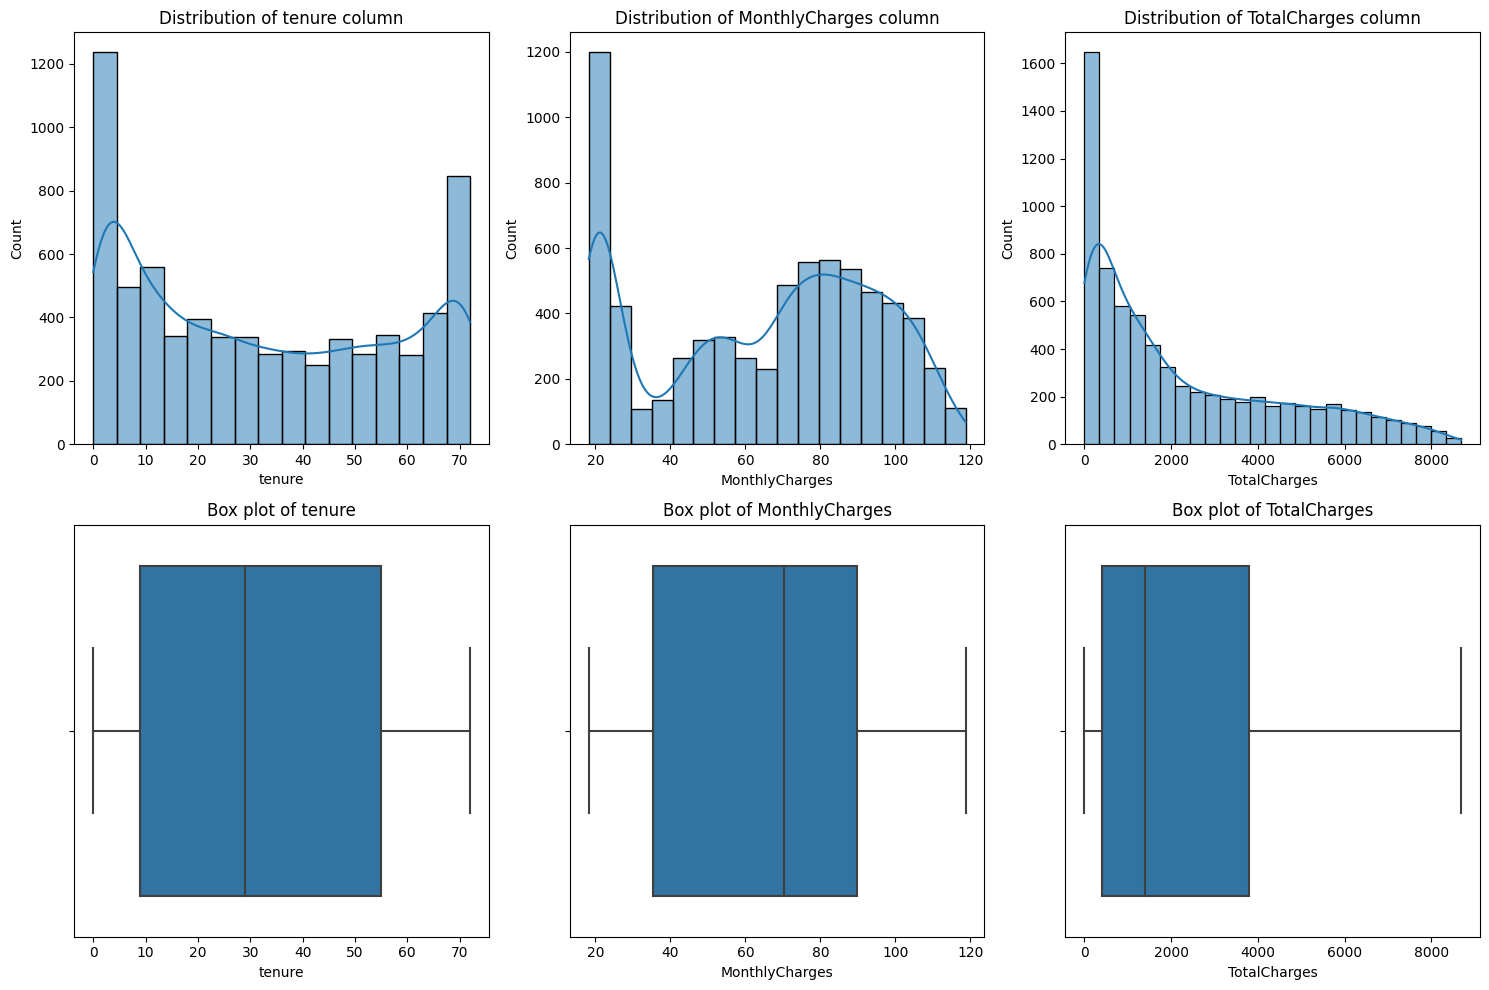

In [13]:
# Visualize the distribution and box plots for numerical columns of contract-related data
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(nrows=2, ncols=len(selected_columns), figsize=(15, 10))
for i, column in enumerate(selected_columns):
    sns.histplot(data[column], ax=axes[0, i], kde=True)
    axes[0, i].set_title(f'Distribution of {column} column')

    sns.boxplot(x=data[column], ax=axes[1, i])
    axes[1, i].set_title(f'Box plot of {column}')        
plt.tight_layout()
plt.show()

I created density plots to compare the distributions of numerical contract-related attributes ('tenure', 'monthly charges' and 'total charges') between churned and non-churned customers. This visualization helps to identify any differences in the feature distributions between the two classes.

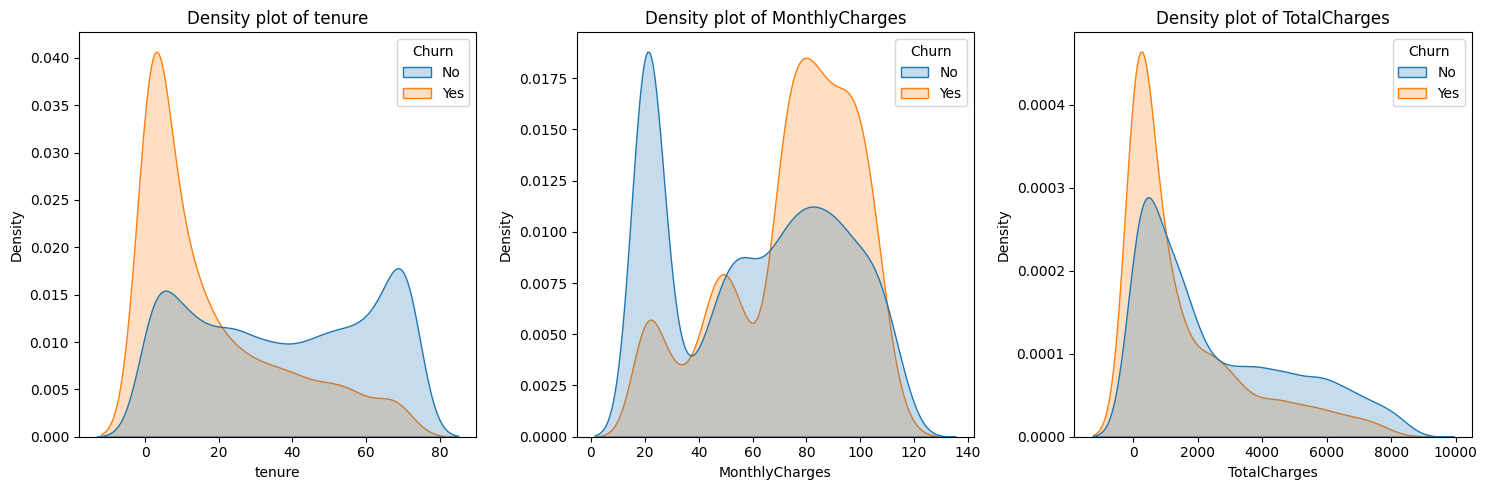

In [14]:
# Visualize the density plots for numerical columns of contract-related data by 'Churn' class
data_select = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
categorical_columns = [col for col in data_select.columns if col != 'Churn']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(categorical_columns):
    sns.kdeplot(data=data_select, x=col, hue='Churn', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(f'Density plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

I used count plots to visualize the distribution for categorical columns of contract-related attributes by the 'Churn' class. This helps to understand how churn varies across different contract options.

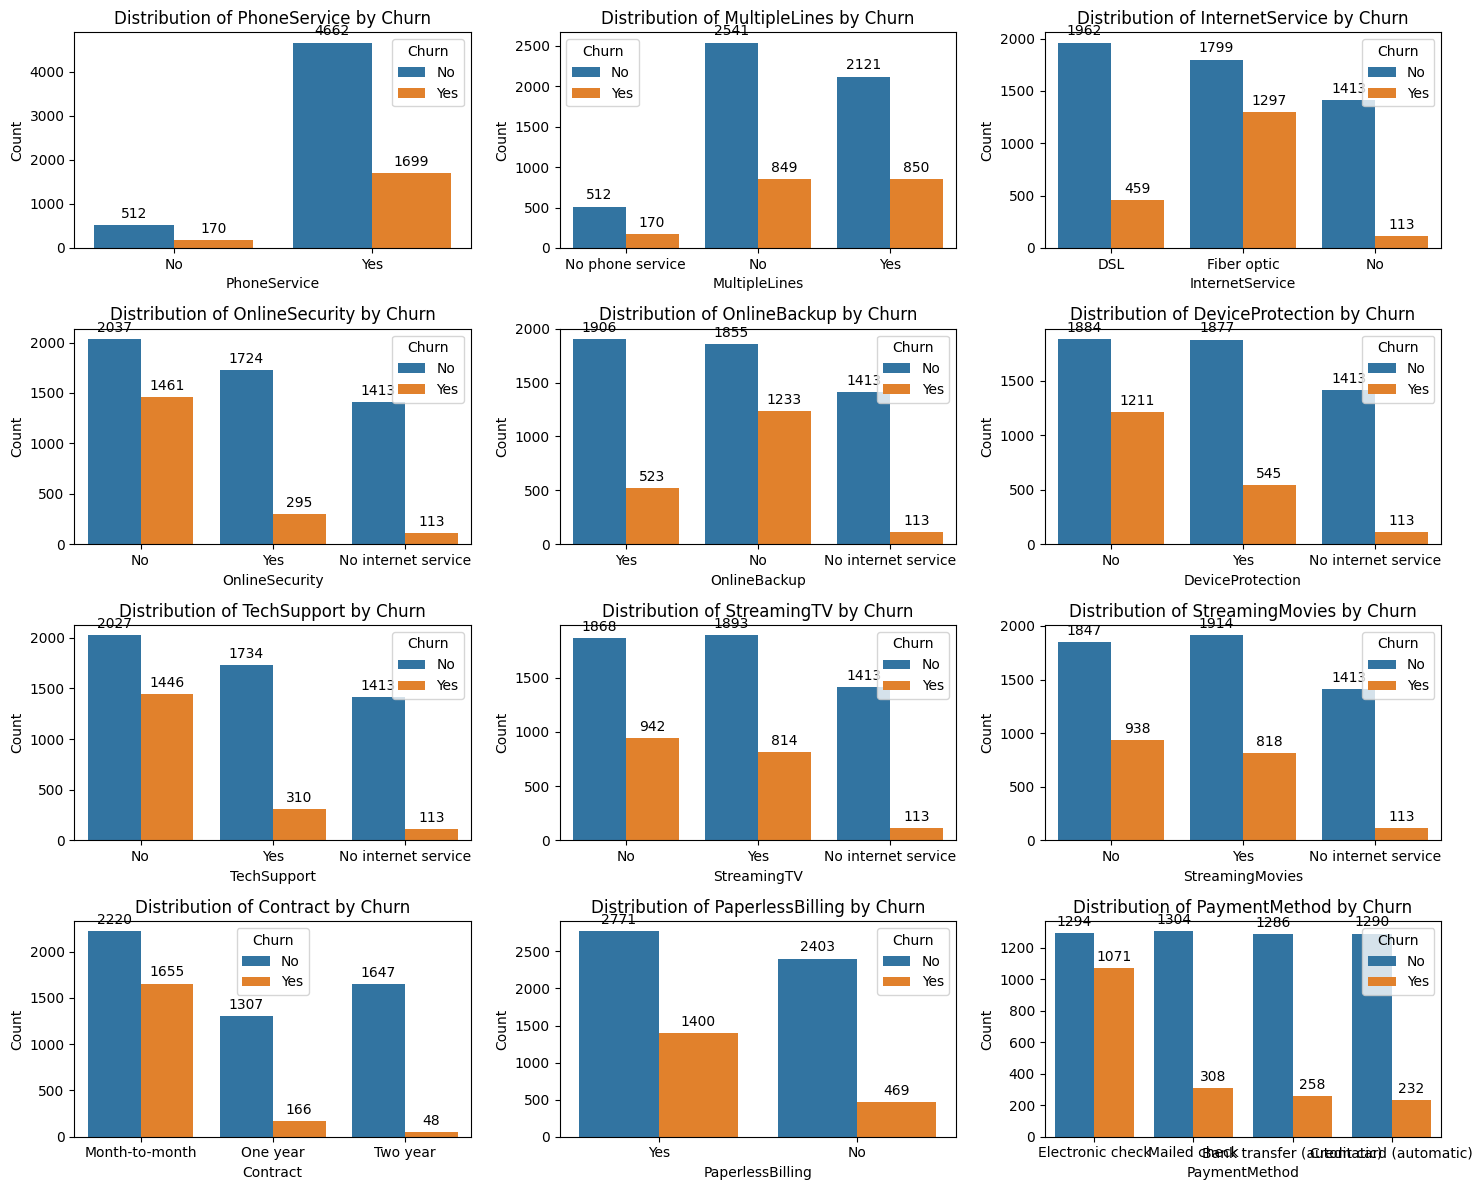

In [15]:
# Visualize the distribution for categorical columns of contract-related data by 'Churn' class
selected_data = data.drop(['tenure', 'gender', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Partner', 'Dependents'], axis=1)
categorical_columns = [col for col in selected_data.columns if col != 'Churn']

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Churn', data=selected_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn')

    # Annotate each bar with its count value
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height),
                         xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        
# Remove any empty subplots
for j in range(len(categorical_columns), 4 * 3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Data Preprocessing and Feature Engineering

Data preprocessing and feature engineering were carried out to prepare the dataset for modeling and to improve the performance of machine learning algorithms in predicting customer churn.

#### 4.1. Encoding Categorical Variables:
To prepare the dataset for modeling, I used the LabelEncoder to convert categorical columns into numerical representations. This allows me to work with non-numeric data in the machine learning models.

In [16]:
# Prepare the dataset for modeling by encoding categorical columns using LabelEncoder
object_columns = data.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
label_data = data.copy()
for column in object_columns:
    label_data[column] = label_data[[column]].apply(label_encoder.fit_transform)

#### 4.2. Visualizing Correlation Matrix:

I visualized the correlation between features using a heatmap to gain insights into multicollinearity.

<Axes: >

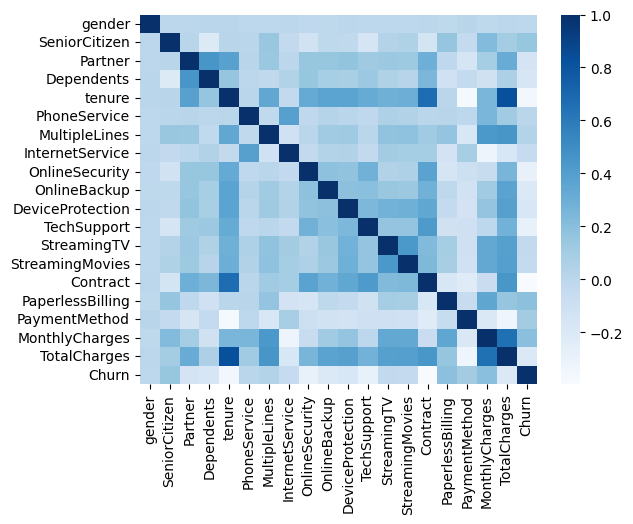

In [17]:
# Visualize the correlation between features using a heatmap
sns.heatmap(label_data.corr(), cmap='Blues')

#### 4.3. Splitting Data into Feature Matrix and Target Vector:
I split the data into a feature matrix (X) and a target vector (y). The feature matrix contains all independent variables, while the target vector holds the 'Churn' column, which serves as the prediction target.

In [18]:
# Split the data into feature matrix X and target vector y
X = label_data.drop('Churn', axis=1)
y = label_data['Churn']

#### 4.4. Scaling Numerical Features:

Numerical features were scaled using the StandardScaler from the scikit-learn library to ensure that all features have the same scale and are centered around zero. 

In [19]:
# Scale the numerical features using StandardScaler
scaler = StandardScaler()
for col in X.columns:
    X[col] = scaler.fit_transform(X[col].values.reshape(-1,1))

#### 4.5. Handling Multicollinearity:
I used Variance Inflation Factor (VIF) to detect multicollinearity among features. Based on the VIF analysis, I dropped the 'TotalCharges' column, which exhibited high multicollinearity with other features.

In [20]:
# Calculate Variance Inflation Factor (VIF) to detect multicollinearity
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF
0,gender,1.001924
1,SeniorCitizen,1.149800
2,Partner,1.460975
3,Dependents,1.382560
4,tenure,7.434158
5,PhoneService,1.622442
6,MultipleLines,1.393894
7,InternetService,1.826657
8,OnlineSecurity,1.268782
9,OnlineBackup,1.217970


In [21]:
# Drop the 'TotalCharges' column due to high VIF indicating multicollinearity
X = X.drop('TotalCharges', axis=1)

In [22]:
# Re-calculate VIF after dropping the column
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF
0,gender,1.001684
1,SeniorCitizen,1.149639
2,Partner,1.460856
3,Dependents,1.382106
4,tenure,2.754468
5,PhoneService,1.622282
6,MultipleLines,1.391652
7,InternetService,1.825876
8,OnlineSecurity,1.247696
9,OnlineBackup,1.185932


#### 4.6. Ranking Features by Importance:

To understand what features will or will not be most important to help us in predicting churn, I used Mutual Information Score. This score ranks the features based on their information gain with respect to the target variable.

In [23]:
# Calculate Mutual Information Score to rank features by importance
mi_scores = {}
for col in X.columns:
    mi_scores[col] = mutual_info_score(X[col], y)
    
mi = pd.DataFrame(mi_scores.items(), columns=['Feature', 'Mutual_Info_Score'])
mi = mi.sort_values(by='Mutual_Info_Score', ascending=False)
print('Ranked Features based on Mutual Information Score:\n', mi)

Ranked Features based on Mutual Information Score:
              Feature  Mutual_Info_Score
17    MonthlyCharges           0.173902
14          Contract           0.098453
4             tenure           0.079309
8     OnlineSecurity           0.064677
11       TechSupport           0.063021
7    InternetService           0.055574
9       OnlineBackup           0.046792
16     PaymentMethod           0.044519
10  DeviceProtection           0.043917
13   StreamingMovies           0.032001
12       StreamingTV           0.031908
15  PaperlessBilling           0.019194
3         Dependents           0.014467
2            Partner           0.011454
1      SeniorCitizen           0.010577
6      MultipleLines           0.000801
5       PhoneService           0.000072
0             gender           0.000037


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Dell\an

#### 4.7. Checking Class Imbalance:
I calculated class proportions to check if the distribution of the target classes were significantly skewed.

In [24]:
# Calculate class proportions to check class imbalance
class_proportion = data['Churn'].value_counts(normalize=True)
class_proportion

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

## 5. Model Building and Evaluation
In this section, I built the machine learning model to predict customer churn and evaluate the performance of each model using relevant metrics such as accuracy, precision, recall and F1 score.

#### 5.1. Splitting Data into Training and Testing Sets:
I split the dataset into training and testing sets to build and evaluate the models properly.

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### 5.2. Model Selection and Evaluation:
I considered Logistic Regression to train the model on the training set and evaluate it on the testing set using metrics such as Accuracy, Precision, Recall, and F1 Score.

In [26]:
# Initialize classifiers
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the logistic regression model using various metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.814878
Precision: 0.691729
Recall: 0.576200
F1 Score: 0.628702


#### 5.3. Handling Class Imbalance with SMOTE:
To address class imbalance, I applied Synthetic Minority Over-sampling Technique (SMOTE) on the training set to oversample the minority class (churned customers).

In [27]:
# Apply SMOTE on the training set to oversample the minority class (Churn = 'Yes')
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### 5.4. Improved Logistic Regression Model:
I retrained the Logistic Regression model on the oversampled data and evaluated its performance using various metrics. This model accounts for class imbalance and offered improved predictive capabilities.

In [28]:
# Fit classifier to the oversampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Retrieve the learned coefficients of the logistic regression model
clf.coef_

array([[ 0.00383371,  0.0098209 ,  0.05929743, -0.15664705, -0.83405144,
        -0.31612183,  0.06016602,  0.21061396, -0.25238837, -0.1512363 ,
        -0.03435016, -0.19457386, -0.05130245,  0.08782871, -0.66606297,
         0.15791049,  0.0829887 ,  0.88550693]])

In [29]:
# Retrieve the intercept of the model
clf.intercept_

array([-0.69114989])

In [30]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

clf.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [31]:
# Get predicted probabilities for each class (0 and 1)
clf.predict_proba(X_test)[::,-1]

array([0.79432631, 0.20036156, 0.01842974, ..., 0.3141558 , 0.84401594,
       0.41749515])

In [32]:
# Re-evaluate the logistic regression model using various metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.762067
Precision: 0.541783
Recall: 0.812109
F1 Score: 0.649958


#### 5.5. Visualizing Model Performance:
I created a Confusion Matrix and a Receiver Operating Characteristic (ROC) Curve to visually assess the model's performance and its ability to discriminate between the two classes (churned and non-churned customers).

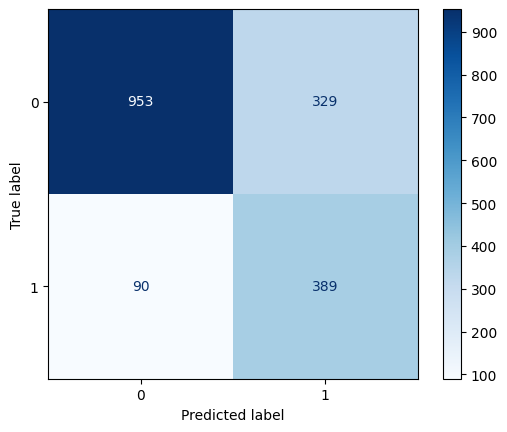

In [33]:
# Create a confusion matrix and visualize it as a heatmap
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
cmap = 'Blues'
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(cmap=cmap)

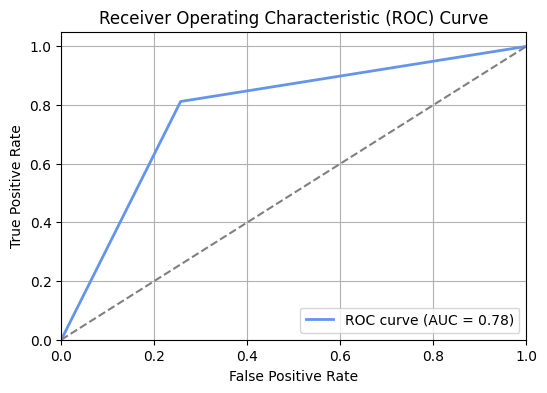

In [34]:
# Calculate ROC curve and AUC (Area Under the Curve) score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='cornflowerblue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 5.6. Feature Importance Analysis:
I analyzed feature importance to understand which features have the most significant impact on predicting customer churn. This analysis helps identify key drivers of churn.

In [35]:
# Calculate feature importance by sorting coefficients by absolute value
coefficients = clf.coef_[0]
feature_names = X.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print('Feature Importance (Most to least):\n', feature_importance)

Feature Importance (Most to least):
              Feature  Coefficient  Abs_Coefficient
17    MonthlyCharges     0.885507         0.885507
4             tenure    -0.834051         0.834051
14          Contract    -0.666063         0.666063
5       PhoneService    -0.316122         0.316122
8     OnlineSecurity    -0.252388         0.252388
7    InternetService     0.210614         0.210614
11       TechSupport    -0.194574         0.194574
15  PaperlessBilling     0.157910         0.157910
3         Dependents    -0.156647         0.156647
9       OnlineBackup    -0.151236         0.151236
13   StreamingMovies     0.087829         0.087829
16     PaymentMethod     0.082989         0.082989
6      MultipleLines     0.060166         0.060166
2            Partner     0.059297         0.059297
12       StreamingTV    -0.051302         0.051302
10  DeviceProtection    -0.034350         0.034350
1      SeniorCitizen     0.009821         0.009821
0             gender     0.003834         0.0

##### 5.7 Visualizing Feature Importance:
I created a bar plot to visualize the feature importance, showcasing the relative significance of each feature in the prediction task.

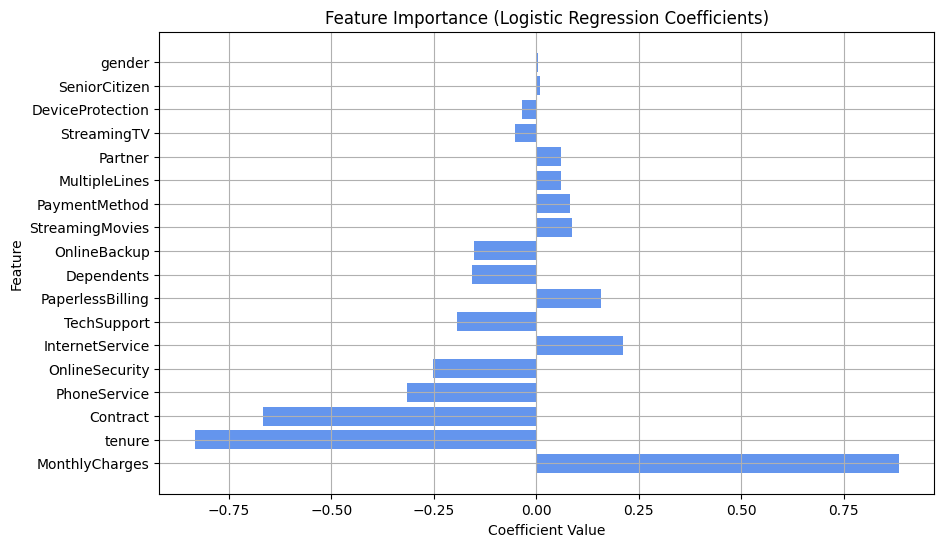

In [36]:
# Visualize feature importance using the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='cornflowerblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.grid(True)
plt.show()

## 6. Key Findings

The analysis unveiled critical insights into churn dynamics:

1. Customers with higher monthly charges were notably more inclined to churn.

2. Longer-tenured customers exhibited reduced churn rates.

3. Customers on month-to-month contracts displayed a higher likelihood of churning compared to those on longer-term contracts.

4. Customers with phone service showed a lower propensity to churn.

## 7. Limitations and Future Possibilities

While the analysis yielded valuable insights, I must acknowledge the limitations that influenced the scope of my findings. These limitations provide opportunities for future exploration:

1. The dataset's relatively small size restricted my ability to capture more nuanced relationships. Future work could involve acquiring larger datasets to enhance the model's predictive power.

2. The model's simplicity prevented it from capturing highly complex relationships within the data. To address this, future projects might involve employing more advanced machine learning algorithms to uncover intricate patterns.

3. The analysis primarily focused on internal factors affecting churn. Future research could consider the influence of external factors, such as market trends or economic conditions, on customer behavior.

## 8. Potential Strategies

Armed with these findings, I propose several strategies to reduce customer churn and enhance customer retention:

1. Introduce tiered pricing, offering lower monthly charges for customers who commit to longer contracts, encouraging loyalty.

2. Provide enticing incentives or discounts for customers who opt for extended contracts, like annual subscriptions.

3. Expand contract options to include mid-term plans, catering to customers seeking a balance between commitment and flexibility.

4. Elevate the value proposition for month-to-month customers with added features or benefits to boost retention.

5. Engage actively with high monthly charge customers, addressing their needs and concerns to enhance satisfaction.

6. Prioritize top-notch customer service, especially for month-to-month subscribers, creating an experience that encourages continued subscriptions.

7. Establish a feedback loop with customers to adapt services based on their evolving needs and concerns.

## 9. Conclusion
In conclusion, this customer churn prediction project provided valuable insights into the factors driving customer churn in a telecommunications company. The logistic regression model allowed us to identify key features affecting churn rates and their relative importance.

Based on the findings, the company can implement targeted retention strategies to reduce customer churn. For instance, providing incentives or promotions to customers with high monthly charges and focusing on improving customer service for month-to-month contract holders can be effective approaches to increase customer loyalty and reduce churn.